In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
%matplotlib inline

# Objectif du notebook

Ce notebook permet de créer les différents fichiers pour les différentes variables à prédire suivant plusieurs période.

Ces fichier sont sauvegardés dans le répertoire ./dataset/.

La période minimum de 3 heures correspond à la période minimale du jeu de données exogène pour la météo.

La période de 1 mois généralise trop les données et ne permet pas d'avoir une représentation réaliste d'une balance négative.

Les bioénergies sont "négligeables" à l'échelle des autres filières de production au niveau national.

La production thermique est en phase terminale d'extinction.

La production nucléaire correspond à une utilisation de la capacité installée, taux de charge, en fonction des phases de maintenance et du besoin en énergie.

# Import du fichier issu du data cleaning

In [2]:
regional = pd.read_csv('./dataset/ENERGIE.csv',
                 header=0, 
                 parse_dates = ['Date'],
                 usecols = ['Date', 'Heure', 'Région',
                            'Consommation (MW)',
                            'Thermique (MW)',
                            'Nucléaire (MW)',
                            'Eolien (MW)',
                            'Solaire (MW)',
                            'Hydraulique (MW)',
                            'Pompage (MW)',
                            'Bioénergies (MW)']
                )
regional.head(1)

,Région,Date,Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW)
0,Auvergne-Rhône-Alpes,2013-01-01,00:30,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0


In [3]:
regional.rename({'Consommation (MW)' : 'Consommation',
           'Thermique (MW)' : 'Thermique',
           'Nucléaire (MW)' : 'Nucléaire',
           'Eolien (MW)' : 'Eolien',
           'Solaire (MW)' : 'Solaire',
           'Hydraulique (MW)' : 'Hydraulique',
           'Pompage (MW)' : 'Pompage',
           'Bioénergies (MW)' : 'Bioénergies',
          }, axis = 1, inplace = True)
regional.head(1)

,Région,Date,Heure,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies
0,Auvergne-Rhône-Alpes,2013-01-01,00:30,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0


In [4]:
regional['Balance'] = regional['Thermique'] + regional['Nucléaire'] + regional['Eolien'] + regional['Solaire'] + regional['Hydraulique'] + regional['Bioénergies'] + regional['Pompage'] - regional['Consommation']
regional.head(1)

,Région,Date,Heure,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Balance
0,Auvergne-Rhône-Alpes,2013-01-01,00:30,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,7548.0


In [5]:
regional['Heure'] = regional['Heure'] + ':00'
regional['Heure'] = pd.to_timedelta(regional['Heure'])#, unit = 'hours')
regional.head(1)

,Région,Date,Heure,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Balance
0,Auvergne-Rhône-Alpes,2013-01-01,0 days 00:30:00,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,7548.0


In [6]:
regional['Dates'] = regional['Date'] + regional['Heure']
regional.head(1)

,Région,Date,Heure,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Balance,Dates
0,Auvergne-Rhône-Alpes,2013-01-01,0 days 00:30:00,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,7548.0,2013-01-01 00:30:00


In [7]:
regional.drop(['Date', 'Heure'], axis = 1, inplace = True)
regional.head(1)

,Région,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Balance,Dates
0,Auvergne-Rhône-Alpes,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,7548.0,2013-01-01 00:30:00


In [8]:
regional['Région'].replace(to_replace = ['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
                                   'Centre-Val de Loire', 'Grand Est', 'Hauts-de-France', 'Normandie',
                                   'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire',
                                   "Provence-Alpes-Côte d'Azur", 'Île-de-France'],
                     value = ['AURA', 'BFC', 'B', 'CVDL', 'GE', 'HF', 'N', 'NlleA',
                              'O', 'PDL', 'PACA', 'IDF'], inplace = True)
regional.head(1)

,Région,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Balance,Dates
0,AURA,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,7548.0,2013-01-01 00:30:00


In [9]:
regional.set_index('Dates', inplace = True)
regional.head(1)

,Région,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Balance
Dates,,,,,,,,,,
2013-01-01 00:30:00,AURA,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,7548.0


In [10]:
france = regional.drop(['Région'], axis = 1)
france = regional.groupby('Dates').sum()
france.reset_index(inplace = True)
france.set_index('Dates', inplace = True)
france.head(1)

,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Balance
Dates,,,,,,,,,
2013-01-01 00:30:00,59662.0,3882.0,50480.0,4170.0,0.0,7517.0,-18.0,760.0,7129.0


# targets périodes de 3 heures

In [11]:
france = france.resample('180T').mean()

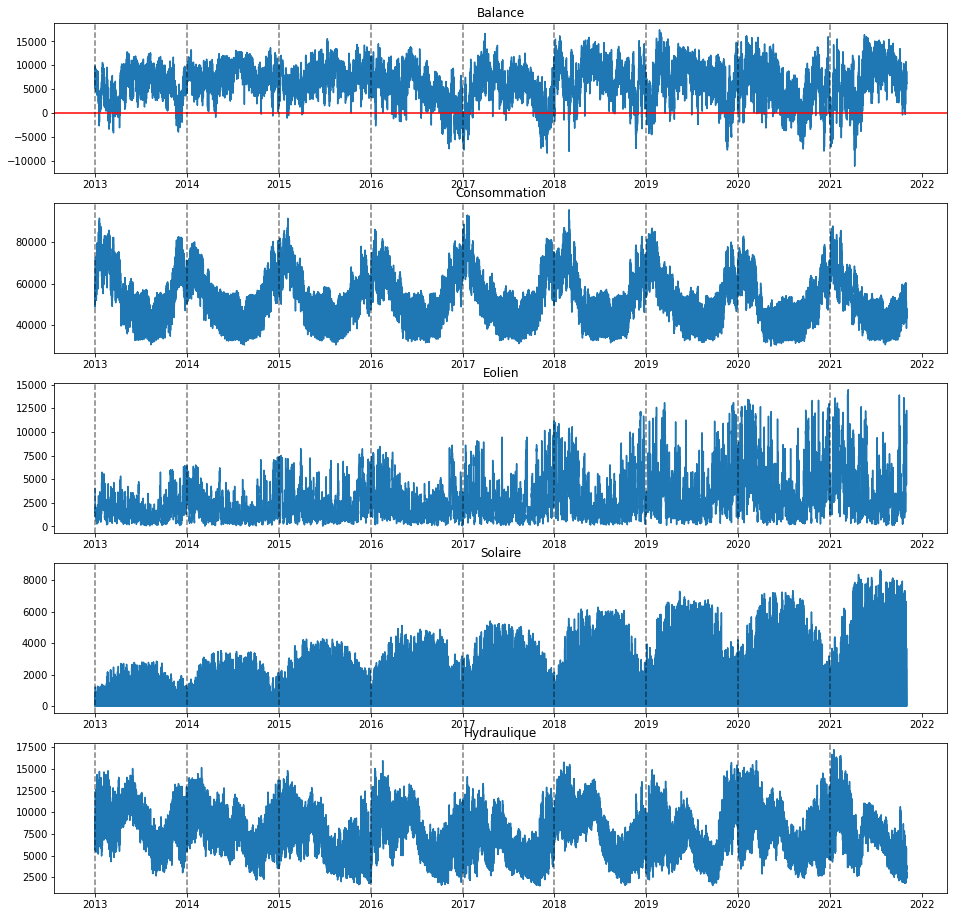

In [12]:
plt.figure(figsize=(16, 16))
plt.subplot(5, 1, 1)
plt.plot(france['Balance'])
plt.title('Balance')
plt.axhline(0, color = 'r');
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 2)
plt.plot(france['Consommation'])
plt.title('Consommation')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 3)
plt.plot(france['Eolien'])
plt.title('Eolien')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 4)
plt.plot(france['Solaire'])
plt.title('Solaire')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 5)
plt.plot(france['Hydraulique'])
plt.title('Hydraulique')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.savefig('./png/dataset_FR_3h.png');

In [13]:
france.to_csv('./dataset/France_3H.csv')

# targets périodes de 1 jour

In [14]:
france = france.resample('D').mean()

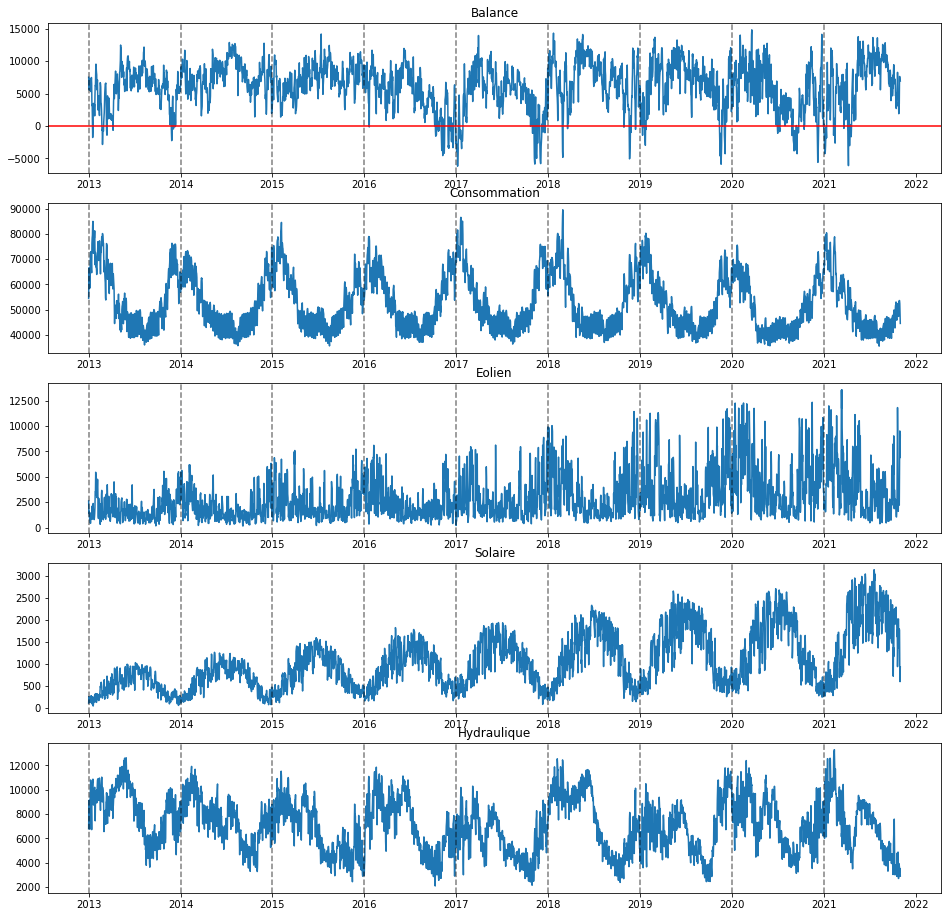

In [15]:
plt.figure(figsize=(16, 16))
plt.subplot(5, 1, 1)
plt.plot(france['Balance'])
plt.title('Balance')
plt.axhline(0, color = 'r');
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 2)
plt.plot(france['Consommation'])
plt.title('Consommation')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 3)
plt.plot(france['Eolien'])
plt.title('Eolien')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 4)
plt.plot(france['Solaire'])
plt.title('Solaire')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 5)
plt.plot(france['Hydraulique'])
plt.title('Hydraulique')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.savefig('./png/dataset_FR_D.png');

In [16]:
france.to_csv('./dataset/France_D.csv')

# targets périodes de 1 semaine

In [17]:
france = france.resample('W').mean()

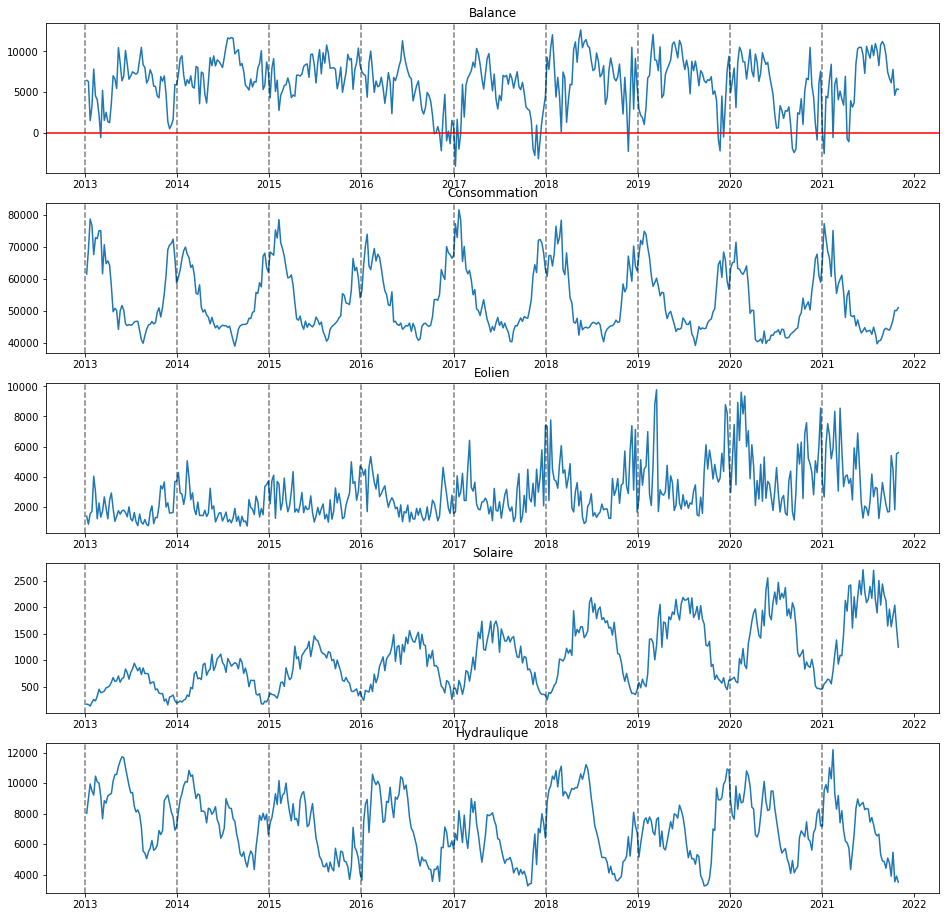

In [18]:
plt.figure(figsize=(16, 16))
plt.subplot(5, 1, 1)
plt.plot(france['Balance'])
plt.title('Balance')
plt.axhline(0, color = 'r');
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 2)
plt.plot(france['Consommation'])
plt.title('Consommation')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 3)
plt.plot(france['Eolien'])
plt.title('Eolien')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 4)
plt.plot(france['Solaire'])
plt.title('Solaire')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 5)
plt.plot(france['Hydraulique'])
plt.title('Hydraulique')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.savefig('./png/dataset_FR_W.png');

In [19]:
france.to_csv('./dataset/France_W.csv')